<a href="https://colab.research.google.com/github/MuhammadVirgiawan774/tugas-kecerdasan-buatan/blob/main/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import zipfile

local_zip ="/content/drive/My Drive/Kecerdasan Buatan/daun_nangka_dan_daun_sirih.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/My Drive')
zip_ref.close()

In [ ]:
base_dir = '/content/drive/My Drive/daun_nangka_dan_daun_sirih'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_Daun_Sirih_dir = os.path.join(train_dir, 'Daun_Sirih')
train_Daun_Nangka_dir = os.path.join(train_dir, 'Daun_Nangka')

validation_Daun_Sirih_dir = os.path.join(validation_dir, 'Daun_Sirih')
validation_Daun_Nangka_dir = os.path.join(validation_dir, 'Daun_Nangka')

In [ ]:
print(os.listdir(train_Daun_Sirih_dir)[:10])
print(os.listdir(train_Daun_Nangka_dir)[:10])

['010.jpg', '001.jpg', '002.jpg', '003.jpg', '004.jpg', '005.jpg', '006.jpg', '007.jpg', '008.jpg', '009.jpg']
['054.jpg', '056.jpg', '057.jpg', '055.jpg', '058.jpg', '060.jpg', '059.jpg', '051.jpg', '052.jpg', '053.jpg']


In [ ]:
print('total training sirih images:', len(os.listdir(train_Daun_Sirih_dir)))
print('total training nangka images:', len(os.listdir(train_Daun_Nangka_dir)))
print('total validation sirih  images:', len(os.listdir(validation_Daun_Sirih_dir)))
print('total validation nangka images:', len(os.listdir(validation_Daun_Nangka_dir)))

total training sirih images: 10
total training nangka images: 10
total validation sirih  images: 10
total validation nangka images: 10


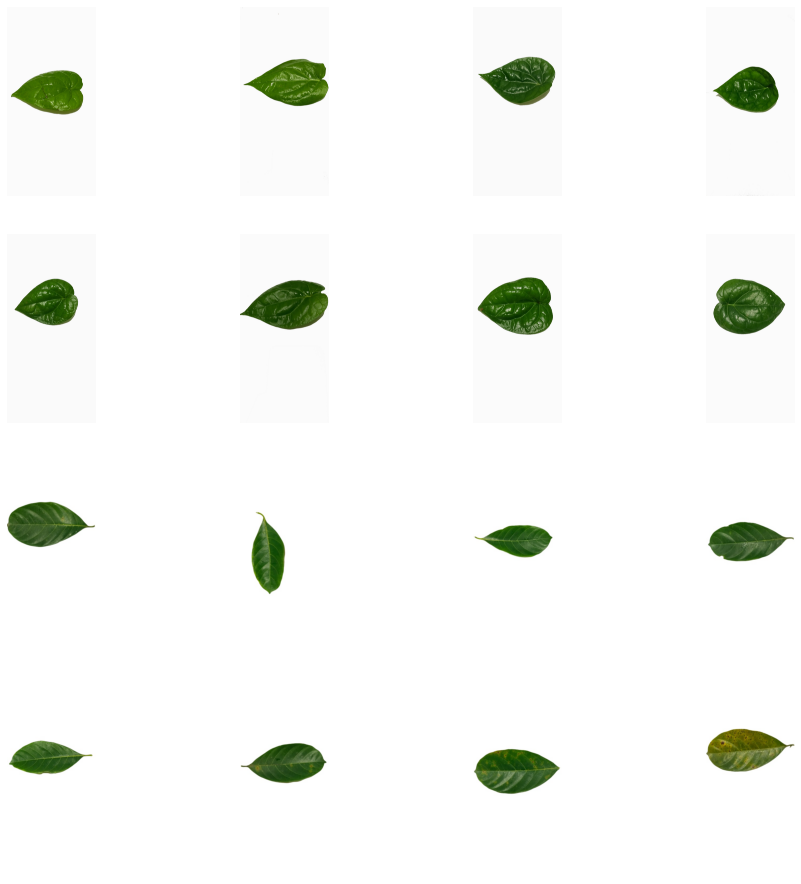

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_Daun_Sirih_dir, fname) 
                for fname in os.listdir(train_Daun_Sirih_dir)[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_Daun_Nangka_dir, fname) 
                for fname in os.listdir(train_Daun_Nangka_dir)[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".png" or ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [ ]:
val_data = []
val_label = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpg" or ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

**Data Preprocessing**

In [ ]:
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (20, 150, 150, 3)
Train Label =  (20,)
Validation Data =  (20, 150, 150, 3)
Validation Label =  (20,)


In [ ]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [251 251 251]
Data setelah di-normalisasi  [0.9843137 0.9843137 0.9843137]


In [ ]:
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[35:45])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[35:45])

Label sebelum di-encoder  []
Label setelah di-encoder  []


**Definisikan Model**

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
# Buat model dengan 1 input layer, 1 hidden layer, dan 1 output layer
img_input = layers.Input(shape=(150, 150, 3)) # layer input
x = layers.Flatten()(img_input) # ubah dari matriks 150x150x3 menjadi vektor
x = layers.Dense(128, activation='relu')(x) # hidden layer 1 dengan 128 neuron
output = layers.Dense(1, activation='sigmoid')(x) # output layer dengan 1 neuron (binary)

# Definisikan modelnya
model = Model(img_input, output)

In [ ]:
# Tampilkan model summary
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 flatten_4 (Flatten)         (None, 67500)             0         
                                                                 
 dense_8 (Dense)             (None, 128)               8640128   
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 8,640,257
Trainable params: 8,640,257
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['acc'])

In [ ]:
H = model.fit(x_train, y_train, batch_size=20, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
1/1 [==============================] - 1s 621ms/step - loss: 0.7606 - acc: 0.5000 - val_loss: 91.8589 - val_acc: 0.5000
Epoch 2/50
1/1 [==============================] - 0s 92ms/step - loss: 91.8589 - acc: 0.5000 - val_loss: 35.0655 - val_acc: 0.5000
Epoch 3/50
1/1 [==============================] - 0s 79ms/step - loss: 35.0655 - acc: 0.5000 - val_loss: 21.2619 - val_acc: 0.5000
Epoch 4/50
1/1 [==============================] - 0s 91ms/step - loss: 21.2619 - acc: 0.5000 - val_loss: 23.4190 - val_acc: 0.5000
Epoch 5/50
1/1 [==============================] - 0s 79ms/step - loss: 23.4190 - acc: 0.5000 - val_loss: 22.6879 - val_acc: 0.5000
Epoch 6/50
1/1 [==============================] - 0s 79ms/step - loss: 22.6879 - acc: 0.5000 - val_loss: 20.1618 - val_acc: 0.5000
Epoch 7/50
1/1 [==============================] - 0s 73ms/step - loss: 20.1618 - acc: 0.5000 - val_loss: 16.4359 - val_acc: 0.5000
Epoch 8/50
1/1 [==============================] - 0s 79ms/step - loss: 16.4359 - ac

**Evaluasi Model**

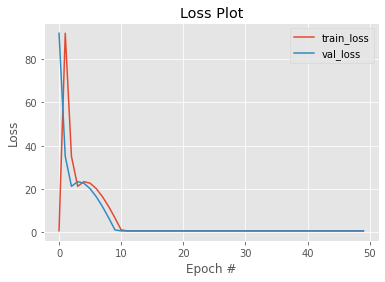

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

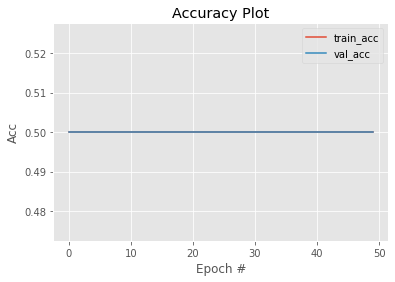

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.50      1.00      0.67        10

    accuracy                           0.50        20
   macro avg       0.25      0.50      0.33        20
weighted avg       0.25      0.50      0.33        20



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
